In [3]:

#be
import pandas as pd
import numpy as np 
import scipy as py
import seaborn as sns
import matplotlib.pyplot as plt

    # Gràfics
from matplotlib import style


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import cross_validate


from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier, export_graphviz  #
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


wine= pd.Cov   = pd.read_csv("Meu_wineData.csv",sep=';', engine='python', names=['Class label', 'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

# carrega el arxiu csv
pd.options.display.max_rows = 9999 #mostrar tots els registres del dataset

## Configuració warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
wine # mostra taula del dataset afegeixo nom de les columnes




,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.8,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.2,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.010,3.55,1045


In [6]:
wine[['Color intensity']]=wine[['Color intensity']].replace(to_replace='9.899.999', value='9.899999', regex=True)
wine.astype({'Color intensity':float})

wine = wine.astype({'Color intensity':'float'})
print(wine.dtypes)




Class label                       int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object


In [7]:
wine['Class label'] = wine['Class label'].astype('float')
wine.dtypes

Class label                     float64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [720]:
wine.shape    #mostra columnes i files

(178, 14)

In [721]:
wine.head(5) #mostra 5 files del dataset

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1.0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1.0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [722]:
wine.isnull().sum() #mirar si falten  registres

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [723]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    float64
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [724]:
wine.describe()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [725]:
display(wine.head())

X = wine.drop('Class label', 1)
y = wine['Magnesium']


# divido X en conjuntos de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print(' datos de entrenamiento train: %d' % X_train.shape[0])
print(' datos test : %d' % X_test.shape[0])
print(' tipos de clases:', np.unique(y))

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1.0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1.0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1.0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1.0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


 datos de entrenamiento train: 124
 datos test : 54
 tipos de clases: [ 70  78  80  81  82  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 110 111 112 113 115 116
 117 118 119 120 121 122 123 124 126 127 128 132 134 136 139 151 162]


In [726]:
# capacitación arboles de decisión  #be

# criterion :función de impureza
# max_depth : profundidad maxima del arbol
# random_state :semilla del generador de numeros aleatorios

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=3, 
                              random_state=0)
tree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [727]:
#no es necesario estandarizar las características de los datos antes de construir un árbol de decisión
#la info obtenida en el punto de corte no cambia 

In [728]:
#Pruebas     
#tenemos un árbol, para ver cómo funciona: en el conjunto de datos de pruebas.

In [729]:
y_pred = tree.predict(X_test)
print('muestras mal classificadas: %d' % (y_test != y_pred).sum())
print('Accuracy (tree): %.2f' % ((y_test == y_pred).sum() / y_test.shape[0]))


from sklearn.metrics import accuracy_score 

print('Accuracy (tree, sklearn): %.2f' % accuracy_score(y_test, y_pred))

muestras mal classificadas: 44
Accuracy (tree): 0.19
Accuracy (tree, sklearn): 0.19


In [730]:
#Random Forests                                   #BE
# criterion :     funcion de impureza
# n_estimators :  numero de arboles de decision
# random_state : semilla utilizada para el generador de números
# n_jobs :  numero de nucleos para el paralelismo



forest = RandomForestClassifier(criterion='entropy',           # que mide la impureza. Determina cómo 
                                n_estimators=200,              # elige un árbol de decisión dividir los datos
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))





Accuracy (forest): 0.22


In [731]:
# el bosque preajustado en SelectFromModel  

sfm = SelectFromModel(forest, threshold=0.16, prefit=True)
Z_forest_alt = sfm.transform(X)

for f in range(Z_forest_alt.shape[1]): #mdf
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))

 1) Magnesium                      0.226292


In [732]:
wine= (wine-wine.mean())/wine.std()
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,-1.210529,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,-1.210529,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,-1.210529,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,-1.210529,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,-1.210529,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [733]:
#para importar modelos para la regresion  


models = {}
def train_validate_predict(regressor, x_train, y_train, x_test, y_test, index):
    model = regressor
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    models[index] = r2

In [734]:
# una función que entrena cada modelo de regresión para poder eligir cuál tiene el puntaje r2 más alto

model_list = [LinearRegression, Lasso, Ridge, BayesianRidge, DecisionTreeRegressor, LinearSVR, KNeighborsRegressor,
              RandomForestRegressor]
model_names = ['Linear Regression', 'Lasso', 'Ridge', 'Bayesian Ridge', 'Decision Tree Regressor', 'Linear SVR', 
               'KNeighbors Regressor', 'Random Forest Regressor']

index = 0
for regressor in model_list:
    train_validate_predict(regressor(), X_train, y_train, X_test, y_test, model_names[index])
    index+=1


In [735]:
models


{'Linear Regression': 1.0,
 'Lasso': 0.9999807198411107,
 'Ridge': 0.9999999978074411,
 'Bayesian Ridge': 1.0,
 'Decision Tree Regressor': 0.987843945349703,
 'Linear SVR': 0.99999176982646,
 'KNeighbors Regressor': 0.4862539611075516,
 'Random Forest Regressor': 0.9950195605118703}

In [736]:
#Tabla de correlación 
#df = datos [[ 'alcohol' , 'magnesio' , 'color_intensity' ]] 
#df . corr ()

#Tabla de correlación 
wine1 = wine[[ 'Alcohol' , 'Magnesium' , 'Color intensity' ]] 
wine1 . corr ()

,Alcohol,Magnesium,Color intensity
Alcohol,1.000000,0.270798,0.546364
Magnesium,0.270798,1.000000,0.199950
Color intensity,0.546364,0.199950,1.000000


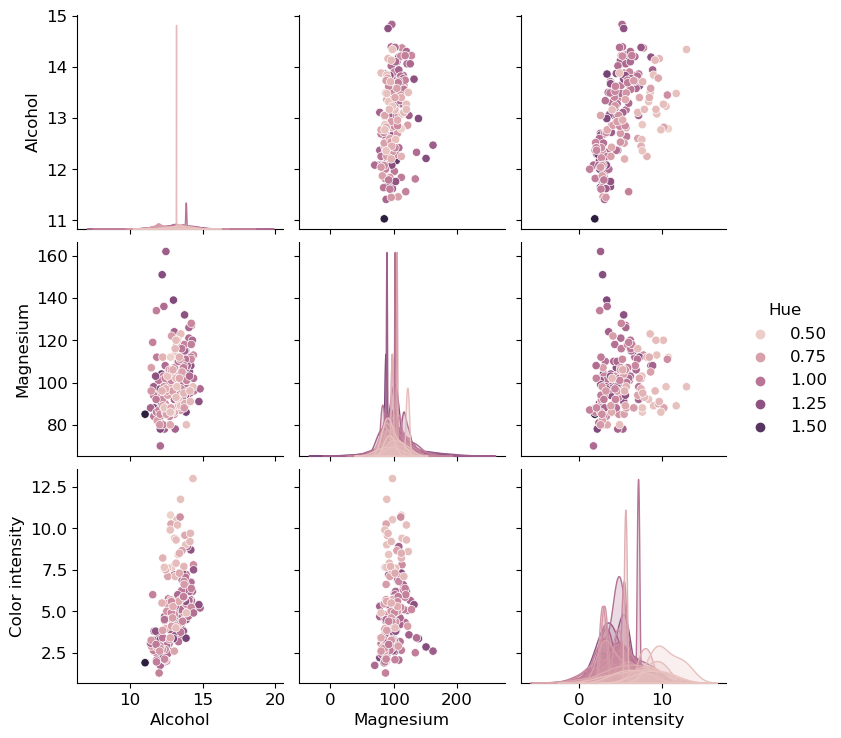

In [510]:
#scatter plots
wine1=wine[['Alcohol' , 'Magnesium' , 'Color intensity','Hue']]
sns.pairplot(wine1,hue='Hue')

In [737]:
# Join again the target variable

finalDf = pd.concat([principalDf, wine[['Hue']]], axis = 1)
finalDf.head()

,PC 1,PC 2,Hue
0,2.784064,0.194238,0.361158
1,-4.073780,-0.878514,0.404908
2,0.567186,2.334468,0.317409
3,1.487467,1.103376,-0.426341
4,-2.962891,-1.442347,0.361158


In [738]:
#Let's transform test data

PCA_test=pca.transform(X_test)

pcaTestDf = pd.DataFrame(data = PCA_test
             , columns = ['PC 1', 'PC 2'])

pcaTestDf.shape

(54, 2)

In [739]:
#Vamos a dividir el dataset usando los datos escalados

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

X_train.shape

(119, 2)

In [740]:
(119, 13)
X_test.shape

(59, 2)

In [741]:
#Apply PCA.

# Create PCA object.
pca = PCA(n_components=2)

#Apply PCA on training data
pComp=pca.fit_transform(X_train)

#Run PCA


principalDf = pd.DataFrame(data = pComp
             , columns = ['PC 1', 'PC 2'])

principalDf.head()

,PC 1,PC 2
0,1.107186,-0.263198
1,-1.076034,-1.572416
2,0.121632,0.827437
3,-1.000694,0.342479
4,-1.274442,-0.483089


In [ ]:
#############################################

In [472]:
# defino X e y 
caracteristicas =  [  'Alcohol', 'Malic acid', 'Ash',
              'Alcalinity of ash', 'Magnesium', 'Total phenols',
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline' ]

# X es una matriz, por lo que usamos [] para acceder a las características que queremos en caracteristicas 
X  =  wine[ caracteristicas ]

# y la usamos para acceder a 'Class label' 

y  =  wine ['Class label']      #['Class label']

In [402]:
# dividir X e y en conjuntos de entrenamiento y prueba



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)




In [403]:
# entreno un modelo de regresión logística en el conjunto de entrenamiento
#from sklearn.linear_model import LogisticRegression

# instanciar el modelo
logreg = LogisticRegression()

# modelo de ajuste
logreg.fit(X_train, y_train)

LogisticRegression()

In [404]:
# hace predicciones de clase para el conjunto de prueba
y_pred_class = logreg.predict(X_test)

In [405]:
#calcular la precisión (accuracy)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9333333333333333


In [406]:
# examinar la distribución 
#de clases del conjunto de prueba (utilizando un método de la serie Pandas)
y_test.value_counts()

2.0    21
1.0    16
3.0     8
Name: Class label, dtype: int64

In [407]:
# # calcular el porcentaje de unos

y_test.mean()

1.8222222222222222

In [408]:
# calcula poecentaje de ceros
1 - y_test.mean()


-0.8222222222222222

In [396]:
# calcular la precisión nula
y_test.value_counts().head(1) / len(y_test)


2.0    0.466667
Name: Class label, dtype: float64

In [409]:
# imprime las primeras 25 respuestas verdaderas y predichas

print('True:', y_test.values[0:25])
print('False:', y_pred_class[0:25])

True: [1. 3. 2. 1. 2. 2. 1. 3. 2. 2. 3. 3. 1. 2. 3. 2. 1. 1. 2. 1. 2. 1. 1. 2.
 2.]
False: [1. 3. 2. 1. 2. 2. 1. 3. 2. 2. 3. 3. 1. 2. 3. 2. 1. 1. 3. 1. 2. 1. 2. 2.
 2.]


In [398]:
#Matriz de confusión 

In [410]:

print ( metrics . confusion_matrix ( y_test ,  y_pred_class ))


[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [400]:
# imprime las primeras 25 respuestas verdaderas y predichas 
print ( 'True' ,  y_test . values [ 0 : 25 ]) 
print ( 'Pred' ,  y_pred_class [ 0 : 25 ])

True [1. 3. 2. 1. 2. 2. 1. 3. 2. 2. 3. 3. 1. 2. 3. 2. 1. 1. 2. 1. 2. 1. 1. 2.
 2.]
Pred [1. 3. 2. 1. 2. 2. 1. 3. 2. 2. 3. 3. 1. 2. 3. 2. 1. 1. 3. 1. 2. 1. 2. 2.
 2.]


In [426]:

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[14  2  0]
 [ 0 20  1]
 [ 0  0  8]]


In [427]:
# Metrics computed from a confusion matrix

# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9444444444444444
0.9333333333333333


In [428]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.05555555555555555
0.06666666666666665


In [432]:
specificity = TN / (TN + FP)

print(specificity)    #Especificidad: cuando el valor real es negativo

0.875


In [433]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.125
0.125


In [434]:
# Ajuste del umbral de clasificación 
from sklearn import metrics

In [587]:
# imprimir las primeras 10 respuestas predichas 

logreg.predict ( X_test )[ 0 : 10 ]

array([1., 1., 2., 3., 2., 1., 3., 3., 3., 2.])

In [588]:
#imprime las primeras 10 probabilidades predichas de pertenencia a una clase

logreg.predict_proba(X_test)[0:10]

array([[0.69755182, 0.1235463 , 0.17890188],
       [0.80340802, 0.1488161 , 0.04777588],
       [0.02311651, 0.95542322, 0.02146026],
       [0.27938585, 0.02214201, 0.69847214],
       [0.15358095, 0.79163855, 0.0547805 ],
       [0.54861107, 0.05922851, 0.39216042],
       [0.28946074, 0.17058191, 0.53995736],
       [0.13509307, 0.33332139, 0.53158555],
       [0.24119677, 0.30248203, 0.4563212 ],
       [0.05700452, 0.86138205, 0.08161343]])

In [589]:
# imprime las primeras 10 probabilidades predichas para la clase 1

logreg.predict_proba(X_test)[0:10, 2]


array([0.17890188, 0.04777588, 0.02146026, 0.69847214, 0.0547805 ,
       0.39216042, 0.53995736, 0.53158555, 0.4563212 , 0.08161343])

In [421]:
# almacenar las probabilidades predichas para la clase 1

y_pred_prob = logreg.predict_proba(X_test)[:, 2]  #model.predict_proba(test)[:,1]
#y_pred_prob = logreg.predict_proba(X_test)[:, 1] 

In [590]:
# grafico

%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frecuencia')

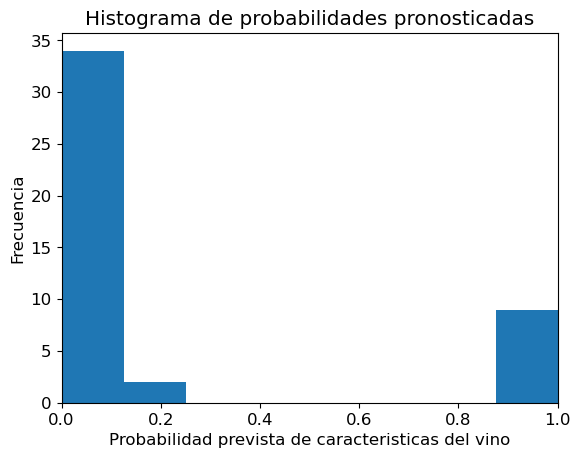

In [591]:
plt . hist ( y_pred_prob ,  bins = 8 )

# límite del eje x de 0 a 1 
plt . xlim ( 0 , 1 ) 
plt . title ( 'Histograma de probabilidades pronosticadas' ) 
plt . xlabel ( 'Probabilidad prevista de caracteristicas del vino' )  # caracteristicas
plt . ylabel ( 'Frecuencia' )

In [ ]:
#?????# en la primer barra estan el 30% de las observaciones, entre 0,0 y 0,1  de 0,1 a 0,25 existen pocos registros
# y de 0,25  a 0,88 no hay,  de 0,88  hasta el 1 hay 10% registros, con frecuencia baja  

#Deberiamos reducir las caracteristicas para tener mas sensibilidad y 
#poder tener resultados mas ajustados para decidir que factores afectan mas a la calidad del vino

In [ ]:
#Grfics per mostrar de forma mes visual los datos del dataset

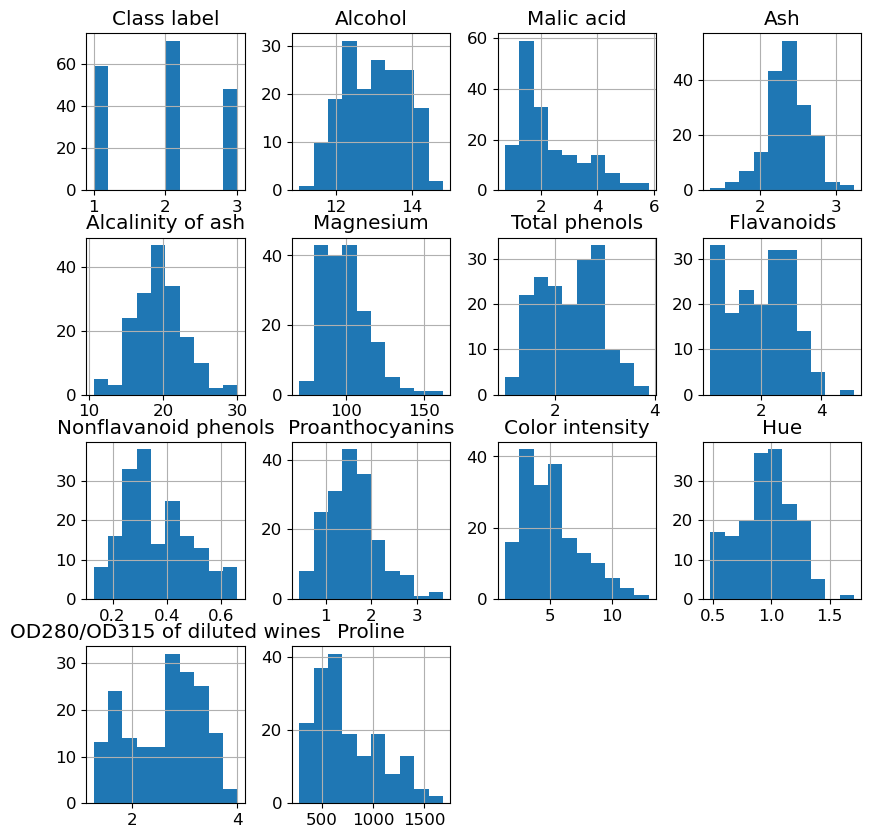

In [459]:
wine.hist(figsize = (10,10)); bo

<AxesSubplot:xlabel='Color intensity', ylabel='Density'>

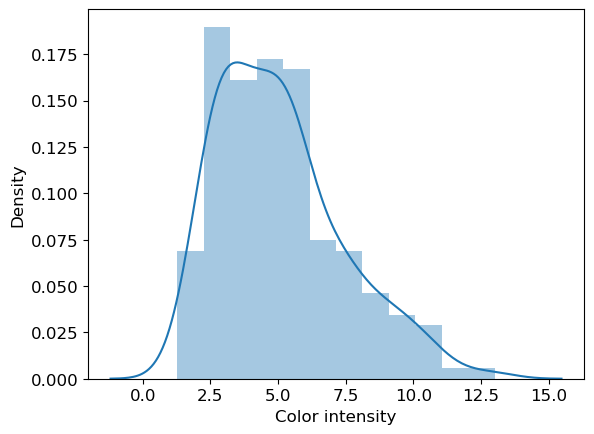

In [460]:
sns.distplot( wine['Color intensity'])

In [597]:
wine['Color intensity'].mean()

-4.21635261037419e-16

In [464]:
color = wine[wine['Color intensity']==5]

<AxesSubplot:>

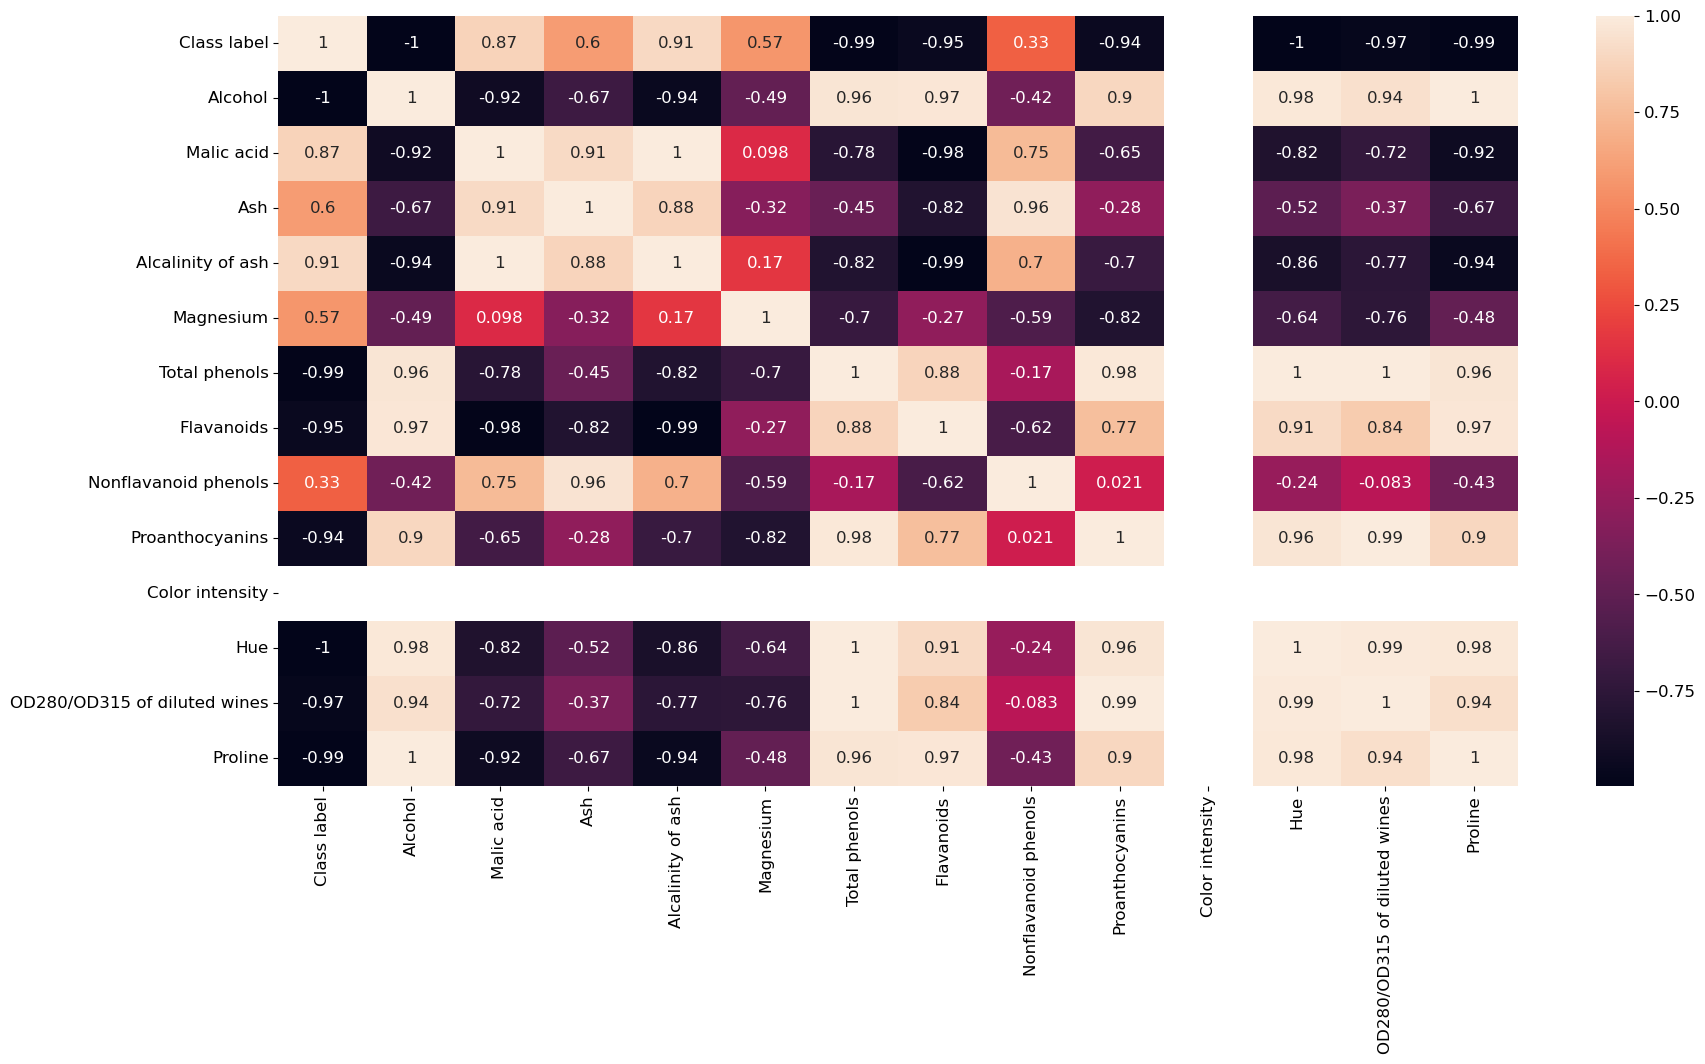

In [465]:
plt.figure(figsize = (20,10))
sns.heatmap(color.corr(), annot=True)

In [702]:
#entrenenando el modelo

alcohol = wine['Alcohol'] 
flavanoids = wine['Flavanoids']


wine = pd.DataFrame({'Alcohol':alcohol, 'Flavanoids': flavanoids})
wine.head(3)


,Alcohol,Flavanoids
0,14.23,3.06
1,13.20,2.76
2,13.16,3.24


In [703]:
#entrenenando el modelo


import scipy.stats as stats       # bo 

col = wine["Alcohol"].tolist()   
wine["Alcohol"].mean()            
col1 = wine["Flavanoids"].tolist()   

wine["Flavanoids"].mean()            # mitjana de la columna "Flavanoids"

                               


col = wine["Alcohol"].values.tolist()          # mostres 
col1 = wine["Flavanoids"].values.tolist()      # mostres  
stats.ttest_ind(col, col1, equal_var=True)     # mira si la variança  es igual o < 4, proba T

Ttest_indResult(statistic=113.72015723552221, pvalue=9.208136062511898e-281)

In [704]:
#trobar variança para cada grup
print(np.var(col), np.var(col1))

0.6553597304633255 0.9921135115515718


In [705]:
relacio_entre_variances= print(np.var(col1)/ np.var(col))

1.5138457024971133


In [ ]:
#H 0 :  µ 1 = µ 2 (las mitjanes de las dos poblacions son iguals)

#H A :  µ 1 ≠µ 2  (la mitjanes  de las dos poblacions  no  son iguales)

# Com  que el valor p de la proba  (pvalue=9.208136062511898e-281) 
# és mes petit que alfa = 0,05,  podem rebutjar la hipótesis nula de la proba.
# tenim evidencia suficient per dir que   es diferent 
#  la diferència ( és a dir  són coses diferents) 

In [706]:
#  train y test  divideixo les dades

X = wine[['Alcohol']]
y = wine['Flavanoids']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                       
                                    )



modelo = LinearRegression()   #creo model
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [679]:
# printo la informació extreta del model 

print("Intercept:", modelo.intercept_)  #ordenada punt on intercepta am la linia


print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))   #coef de correlació
print("Coeficiente de determinación R^2:", modelo.score(X, y))          #R^2



# R2 mesura si un model de regresió s'ajusta a les dades reals.
# es  una mesura de la precisió general del model.
# R al quadrat es coneix com el coeficient de determinació.

##coef de correlació= Ens diu la intensidat de la relació lineal entre dos variables en un análisis de correlació.

Intercept: [-3.08152869]
Coeficiente: [('Alcohol', 0.38892065266705117)]
Coeficiente de determinación R^2: 0.046791978585555394


In [707]:
prediccions = modelo.predict(X = X_test)
print(prediccions[0:3,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediccions,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")


# RMSE ( root mean square error ) la diferencia entre los resultados reales  y  los resultados calculados del nuestro modelo

[[2.26530849]
 [2.1362398 ]
 [1.93105368]]

El error (rmse) de test es: 0.8410714827611169


In [708]:
import statsmodels.api as sm   #ok 
    
#Creación del modelo utilizando matrices 

# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     10.14
Date:                Sun, 26 Feb 2023   Prob (F-statistic):            0.00179
Time:                        22:51:15   Log-Likelihood:                -201.20
No. Observations:                 142   AIC:                             406.4
Df Residuals:                     140   BIC:                             412.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2786      1.357     -1.679      0.0

In [683]:
#por cada unidad que se incrementa la variable alcohol, se espera que el     #ok
#odds de la variable Flavanoids se incremente en promedio 0.3889 unidades.

In [694]:
# Predicción de probabilidades    #ok

predicciones = modelo.predict(exog = X_train)
predicciones[:4]

array([2.16501092, 1.8577636 , 1.67108169, 2.50726109])

In [709]:
# la probabilidad de pertenecer a la clase de referencia. #ok

clasificacion = np.where(predicciones<1.8, 1.3, 2.3) 
clasificacion
# clasificación final,  los valores de probabilidad mayores de 1.8 a 2.3 y los mejores 1.3


array([2.3, 1.3, 2.3, 2.3, 1.3, 2.3, 2.3, 2.3, 1.3, 2.3, 1.3, 1.3, 1.3,
       2.3, 1.3, 2.3, 2.3, 2.3, 2.3, 1.3, 2.3, 1.3, 2.3, 2.3, 2.3, 2.3,
       2.3, 2.3, 2.3, 2.3, 1.3, 2.3, 2.3, 2.3, 1.3, 1.3])